# Usando o modelo treinado para avaliar imagens novas.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1qcIGEaJFcffVg5T76bMZsOefc7NQJiq_)

## **Programa de Pós-Graduação PPG TIG Saúde**
### *Mestranda: Dieine Bernieri Schiavon (bsandrade11@gmail.com)*

In [23]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/full_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                 

In [24]:
from tqdm import tqdm #Import para progressbar

## Bibliotecas para as imagens
import os
import cv2
from PIL import Image
from skimage.transform import resize

datadir = '/content/drive/MyDrive/sartaj_small/Testing' # Modificar para o seu diretório no Colab
categories = ['no_tumor', 'meningioma', 'pituitary', 'glioma']
X = []
y = []
image_shape = (128,128,1)

for category in categories:
    path = os.path.join(datadir, category)
    for image in tqdm(os.listdir(path), desc=f'Processing {category}'):
        images = cv2.imread(os.path.join(path, image))
        color = cv2.imread(path, cv2.COLOR_BGR2GRAY) #Transforma para grayscale
        images = resize(images, (image_shape), mode = 'constant', preserve_range = True)
        images = np.array(images)
        X.append(images)
        y.append(categories.index(category))

Processing glioma: 100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


In [25]:
import numpy as np

target_dict={k: v for v, k in enumerate(np.unique(y))}
target_val=  [target_dict[y[i]]
              for i in range(len(y))]

classes = np.unique (y)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  4
Classes:  [0 1 2 3]


In [26]:
from sklearn.model_selection import train_test_split

# Split o dataset em treino e teste
x_test, y_test = (X,y)

# Transformar em array numpy
X_test = np.array(x_test)
y_test = np.array(y_test)

# É sempre bom imprimir suas formas!
print("Number of samples in the testing set (x_test):", len(X_test))
print("X_test shape: ", X_test.shape)

Number of samples in the testing set (x_test): 200
X_test shape:  (200, 128, 128, 1)


In [27]:
print ('Loss and Accuracy:')
model.evaluate(X_test, y_test)

Loss and Accuracy:
7/7 [==============================] - 0s 25ms/step - loss: 2.3813 - accuracy: 0.7350


[2.3813135623931885, 0.7350000143051147]

7/7 [==============================] - 0s 24ms/step


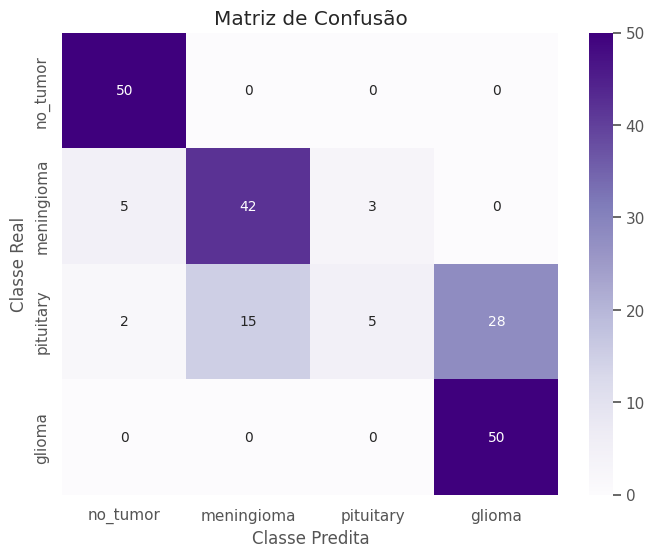

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predição
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
#print(cm)

# Rótulos das classes
classes = categories

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()